# Intro
- A dynamical system is a triple
    $$
    (S,T,\Phi)
    $$
    where 
    - $S$ is the **state space**
    - $T$ is the **parameter space**
    - $\Phi: (T\times S) \to S$ is the **evolution**

In [5]:
import numpy as np
import matplotlib.pyplot as plt


# Differential Equations
- First-order ODE
    $$
    \dot{y} = f(y,t),  \quad y (t_{0}) = y_{0}
    $$
    where we use the shorthand notation $\dot{y} \coloneqq \frac{dy}{dt}$

## Numerical Solution
- **Euler method**: Consider the IVP
    $$
    \dot{y} = f(y,t),\quad y(t_{0}) = y_{0}
    $$
    - Pick a step-size $h>0$, a number of steps $N$, and define
        $$
        \begin{cases}
        y_{n+1} = y_{n} + hf(y_{n},t_{n})\\
        t_{n+1} = t_{n} + h
        \end{cases}
        $$
- Runge-Kutta Methods
    $$
    \begin{cases}
    y_{n+1} = y_{n} + \frac{1}{6} h( k_{1} + 2k_{2}, 2k_{3}, k_{4}) \\
    k_{1} = f(y_{n},t_{n})\\
    k_{2} = f\left(y_{n} + h \frac{k_{1}}{2}, t_{n} + \frac{h}{2}\right) \\
    k_{3} = f\left(y_{n} + h \frac{k_{2}}{2}, t_{n} + \frac{h}{2}\right) \\
    k_{4} = f(y_{n} + hk_{3}, t_{n} + h)
    \end{cases}
    $$

## Example: Lotka-Volterra equations
$$
\begin{cases}
x = x - xy\\
y = xy - y
\end{cases}
$$

In [6]:
def LV(x,y):
    return np.array([x*(1-y), y*(x-1)])

    
def rk4(f, x0, y0, h, n):

    v = [0] * (n+1)             # array to store the solution
    v[0] = np.array([x0, y0])   # initial condition
    x = x0                      # initial x
    y = y0                      # initial y
    
    for i in range(1, n+1):
        k1 = h * f(x,y)
        k2 = h * f(x + 0.5 * k1[0], y + 0.5 * k1[1])
        k3 = h * f(x + 0.5 * k2[0], y + 0.5 * k2[1])
        k4 = h * f(x + k3[0], y + k3[1])
        v[i] = v[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
        x = v[i][0]
        y = v[i][1]
        
    t = np.array([i*h for i in range(n+1)])
    return t, np.array(v)

def euler(f, x0, y0, h, n):
    
    v = [0] * (n+1)
    v[0] = np.array([x0, y0])
    x = x0
    y = y0
    
    for i in range(1, n+1):
        v[i] = v[i-1] + h * f(x,y)
        x = v[i][0]
        y = v[i][1]
        
    t = np.array([i*h for i in range(n+1)])
    return t, np.array(v)

def plot_integrator(v_euler, v_rk4, t_euler, t_rk4, v_true, t_true, h):
    fig = plt.figure(figsize=(18,8))
    ax0 = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    
    ax0.plot(t_euler, v_euler, marker="x")
    ax1.plot(t_rk4, v_rk4, marker="x")

    ax0.plot(t_true, v_true)
    ax1.plot(t_true, v_true)

    ax0.set_ylim(0, 3.5)
    ax1.set_ylim(0, 3.5)

    ax0.set_xlabel(r"t", fontsize=25)
    ax0.set_title("Euler, $h=$" + h, fontsize=25)
    ax0.legend(["x Euler", "y Euler", "x True", "y True"])
    ax1.set_xlabel(r"t", fontsize=25)
    ax1.set_title("RK4, $h=$" + h, fontsize=25)
    ax1.legend(["x RK4", "y RK4", "x True", "y True"])

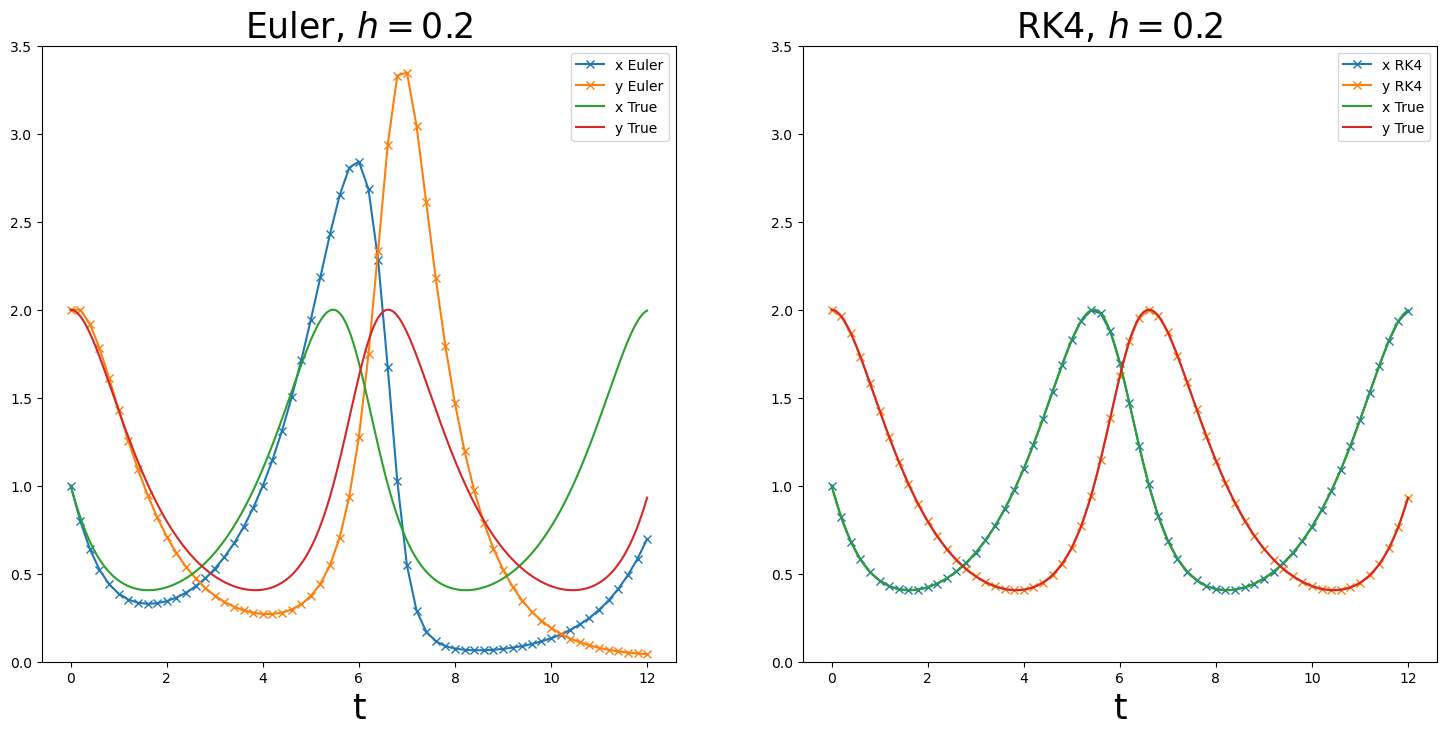

In [7]:
h = 0.2

t_euler, v_euler = euler(LV, 1., 2., h, 60)
t_rk4, v_rk4 = rk4(LV, 1., 2., h, 60)
t_true, v_true = rk4(LV, 1., 2., 0.003, 4000)

plot_integrator(v_euler, v_rk4, t_euler, t_rk4, v_true, t_true, str(h))

In [8]:
x = [i[0] for i in v_true]
y = [i[1] for i in v_true]

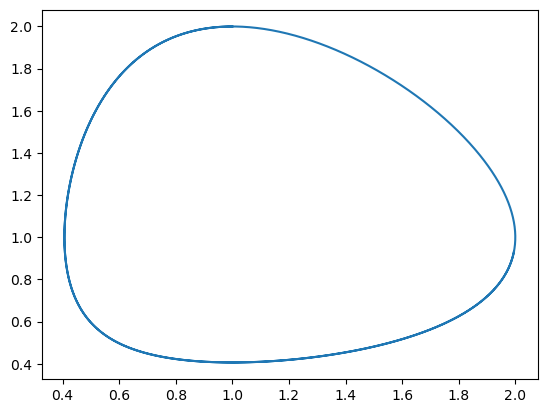

In [9]:
plt.plot(x,y)

## Phase space and phase portrait
- Consider the differential equation for the simple pendulum of mass $1$, length $1$, and $g$ set to $1$ for convenience:
    $$
    \ddot{\theta} + \sin \theta =0
    $$
  - It is a second-order ODE, but can be transformed in the following equivalent system of first-order ODEs, by introducing the ausiliary variable $p_{\theta} =\dot{\theta}$
    $$
    \begin{cases}
    \dot{\theta} = p_{\theta}\\
    \dot{p}_{\theta} = \sin \theta
    \end{cases}
    $$
    $S^{1}\times \mathbb{R}$ is called the **phase space**, and $(\theta, p_{\theta}) \in S^{1}\times \mathbb{R}$ are called **pahse space variables** ($\theta$ is periodic and therefore $S^{1} = \{x \mod 2\pi\vert x\in \mathbb{R}\}$)
  - Given a slution $(\theta(t), p_{\theta}(t))$



In [10]:
def pendulum(x,y):
    return np.array([y, -np.sin(x)])

def plot_phase_space(v):
    fig = plt.figure(figsize=(10,6))
    ax0 = fig.add_subplot(111)
    
    ax0.plot([p[0] for p in v], [p[1] for p in v])
    
    ax0.set_xlabel(r"$\theta$", fontsize= 25)
    ax0.set_ylabel(r"$p_{\theta}$", fontsize= 25)
    ax0.set_title("Phase space", fontsize= 25)
    ax0.set_aspect('equal')

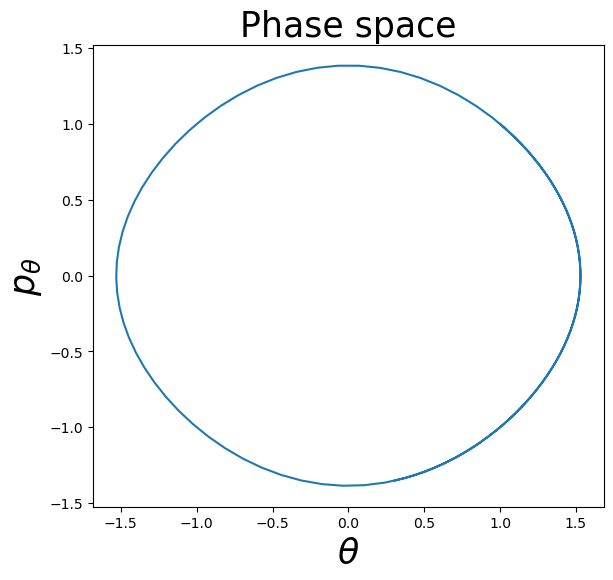

In [11]:
t_pendulum, v_pendulum = rk4(pendulum, 1., 1., 0.1, 100)
plot_phase_space(v_pendulum)

In [12]:
# Plot the phase space portrait of the pendulum for different initial conditions
def plot_pahse_space_pendulum(V):
    
    fig = plt.figure(figsize=(18,8))
    ax0 = fig.add_subplot(121)
    
    for v in V:
        ax0.plot([p[0] for p in v], [p[1] for p in v], color='b')
    
    ax0.set_xlabel(r"$\theta$")
    ax0.set_ylabel(r"$p_{\theta}$")
    ax0.set_title("Phase space portrait")
    ax0.set_aspect('equal')

def plot_phase_space_LV(V):
    fig = plt.figure(figsize=(18,8))
    ax0 = fig.add_subplot(121)

    for v in V:
        ax0.plot([p[0] for p in v], [p[1] for p in v], color='b')
        
    ax0.set_xlabel(r"x")
    ax0.set_ylabel(r"y")
    ax0.set_title("Phase space portrait")
    
    
    

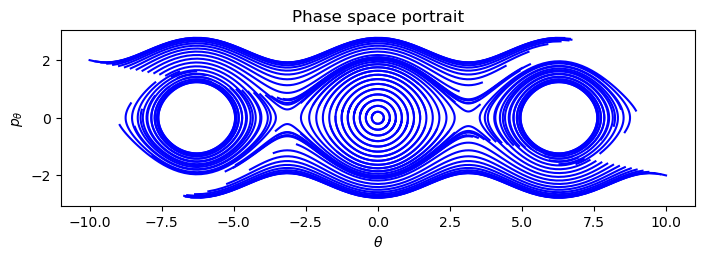

In [13]:
IV = [[5*i, -i] for i in np.linspace(-2,2,99)]
paths = []
for iv in IV:
    t,v = rk4(pendulum, iv[0], iv[1], 0.1, 70)
    paths.append(v)
    
plot_pahse_space_pendulum(paths)

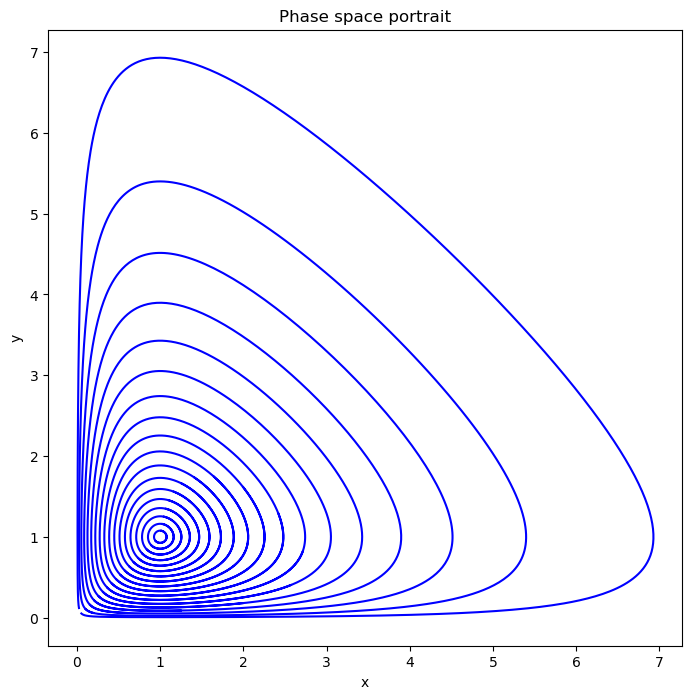

In [14]:
IV = [[i, i] for i in np.linspace(0, 1, 20)] # initial values
paths = []
for iv in IV:
  t, v = rk4(LV, iv[0], iv[1], 0.01, 1000)
  paths.append(v)

plot_phase_space_LV(paths)


# 2. Neural ODEs
## Introduction
- Suppose we have a first-order ODE:
    $$
    \dot{\mathbf{y}} (t) = f(\mathbf{y}(t),t, \theta),\, \mathbf{y}(t_{0}) = \mathbf{y}_{0},\, f: \mathbb{R}\times \mathbb{R}^{n} \to \mathbb{R}^n \tag{2.1}
    $$
    Our goal is to solve initial value problems (IVP), i.e., predict $\mathbf{y}_{t_{1}}$ given $\mathbf{y}_{t_{0}}$
    $$
    \mathbf{y}(t_{1}) = \mathbf{y}(t_{0}) + \int_{t_{0}}^{t_{1}}f(\mathbf{y}(t),t,\theta)\, dt = \text{ODESolve}(\mathbf{y }(t_{0}), f, t_{0}, t_{1}, \theta) \tag{2.2}
    $$
- We could use a numerical solver to perform the forward pass and solve the VIP. For example, Euler's method:
    $$
    \mathbf{y}(t+h) = \mathbf{y}(t) + h f(\mathbf{y}(t), t) \tag{2.3}
    $$

## Comprasison to ResNets
- ResNets update hidden states by employing residual connections
    $$
    \mathbf{y}_{l+1}= \mathbf{y}_{l} + f(\mathbf{y}_{l},\theta_{l})
    $$
    where $f$ is a nerual network with parameters $\theta_{l}$, and $\mathbf{y}_{l}$ and $\mathbf{y}_{l+1}$ are the hidden states at subsequent layers, $l \in \{0,\dots, L\}$.

## Backpropagation
- We want to optimmize out scalar-valued loss funciton $\mathcal{L}$ with respect to model parameters $\theta$
    $$
    \mathcal{L}(\mathbf{x}(t_{1})) = \mathcal{L}\left(\mathcal{x} + \int_{t_{0}}^{t_{1}} f(\mathbf{x}(t),t,\theta)\right) = \mathcal{L}(\text{ODESolve}(\mathbf{x}(t_{0}), f, t_{0},t_{1},\theta))
    $$
- How to compute $\frac{d\mathcal{L}(\mathbf{x}(t_{1}))}{d\theta}$? **Adjoint method!**
    - We calculate the gradient of the loss depends on the hidden state, which is called **adjoint**: $\mathbf{a}(t)\coloneqq \frac{\partial \mathcal{L}}{\partial \mathbf{x}(t)}$, It statisfies the following ODE:
        $$
        \frac{d\mathbf{a}(t)}{dt} = - \mathbf{a}(t)^{T} \frac{\partial f(\mathbf{x}(t),t,\theta)}{\partial \mathbf{x}(t)} \tag{2.4}
        $$
    - Finally, we could compute the gradient with respect to $\theta$ $\frac{\partial \mathcal{L}}{\partial \theta} = \frac{\partial \mathcal{L}}{\partial \mathbf{x}(t)} \frac{\partial \mathbf{x}(t)}{\partial \theta}$
        $$
        \frac{d \mathcal{L}}{d\theta} = -\int_{t_{1}}^{t_{0}}\mathbf{a}(t)^{T} \frac{\partial f}{\partial \theta}\, dt,\tag{2.5}
        $$

## Codes

In [128]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torch.nn.functional as F
from torch.utils.data import Dataset
import torchdiffeq

import pytorch_lightning as pl
from torchmetrics.classification import Accuracy

In [49]:
class MoonsDataset(Dataset):
    def __init__(self, num_samples=100, noise_std=1e-4):
        self.num_samples = num_samples
        self.noise_std = noise_std
        self.X, self.y = self.generate_moons(num_samples, noise_std)
    
    @staticmethod
    def generate_moons(num_samples=100, noise_std=1e-4):
        """Create a *moon* dataset of `num_samples` data points.
        :param `num_samples`: number of data points in the generated dataset.
        :type `num_samples`: int
        :param `noise_std`: standard deviation of noise magnitude added to each data point.
        :type `noidse_std`: float
        """
        num_sample_out = num_samples // 2
        num_sample_in = num_samples - num_sample_out

        theta_out = np.linspace(0, np.pi, num_sample_out)
        theta_in = np.linspace(0, np.pi, num_sample_in)

        outer_circ_x = np.cos(theta_out)
        outer_circ_y = np.sin(theta_out)

        inner_circ_x = 1 - np.cos(theta_in)
        inner_circ_y = 1 - np.sin(theta_in) - 0.5
        

        X = np.vstack([np.append(outer_circ_x, inner_circ_x),
                       np.append(outer_circ_y, inner_circ_y)]).T
        y = np.hstack([np.zeros(num_sample_out), np.ones(num_sample_in)])
        
        # print(X.size)
        if noise_std is not None:
            # pass
            X += noise_std * np.random.rand(num_samples,2)
            
        X = torch.Tensor(X)
        y = torch.LongTensor(y)
        
        return X,y
    
    def __len__(self):
        return self.num_samples
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
        

In [54]:
def plot_binary_classification_dataset(X, y, title=None):
    CLASS_COLORS = ['coral', 'darkviolet']
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(X[:,0], X[:,1], color=[CLASS_COLORS[yi] for yi in y], alpha=0.6)
    ax.set_aspect('equal')
    if title is not None:
        ax.set_title(title)

    return fig, ax


In [55]:
np.vstack([np.append(np.random.rand(100), np.random.rand(2)),np.append(np.random.rand(100), np.random.rand(2)) ])

array([[0.06988712, 0.79574038, 0.36172842, 0.43143619, 0.82656975,
        0.75373181, 0.09866405, 0.45326126, 0.1264689 , 0.08937673,
        0.2140003 , 0.02241639, 0.41704016, 0.57159789, 0.33694625,
        0.32712452, 0.93857788, 0.76370137, 0.86456819, 0.72572562,
        0.51944549, 0.62315769, 0.73171279, 0.39945284, 0.85472521,
        0.68512164, 0.00241211, 0.96930067, 0.94998049, 0.60299842,
        0.79701132, 0.06917086, 0.78843453, 0.57888291, 0.04215932,
        0.72936017, 0.8923659 , 0.25863309, 0.33045384, 0.22174962,
        0.35543106, 0.72273821, 0.89866084, 0.67679442, 0.49753768,
        0.30744749, 0.06222489, 0.00649172, 0.13690624, 0.50376349,
        0.28788148, 0.96112886, 0.61296799, 0.58658321, 0.91812102,
        0.45657926, 0.10730177, 0.98708825, 0.84737078, 0.95572505,
        0.67227186, 0.44471071, 0.56891649, 0.60605784, 0.84617026,
        0.0894659 , 0.50557732, 0.89671058, 0.69094215, 0.14137269,
        0.37491555, 0.49019552, 0.4676605 , 0.51

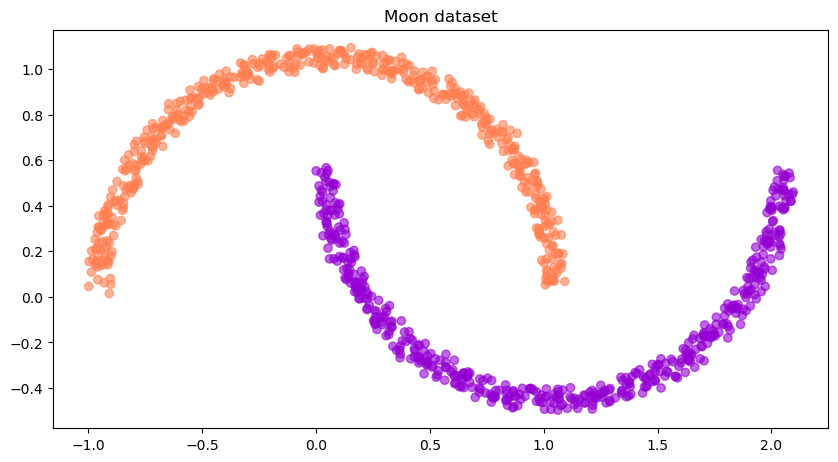

In [57]:
sample_dataset = MoonsDataset(num_samples=1000, noise_std=1e-1)
fig, ax = plot_binary_classification_dataset(sample_dataset.X, sample_dataset.y, title="Moon dataset")

In [61]:
from typing import Optional, List

In [89]:
# split_dataset into smaller subsets
from pytorch_lightning.utilities.types import EVAL_DATALOADERS
import torch.utils
import torch.utils.data


def split_dataset(dataset_size:int, split_percentages:List[float]) -> List[int]:
    split_percentages = [i/sum(split_percentages) for i in split_percentages]
    split_sizes = [int(pi * dataset_size) for pi in split_percentages]
    split_sizes[0] += dataset_size - sum(split_sizes)
    return split_sizes

    
class ToyDataModule(pl.LightningDataModule):
    def __init__(self, dataset_size:int, split_percentages:Optional[float]=None):
        super().__init__()
        self.dataset_size = dataset_size
        if split_percentages is None:
            split_percentages = [0.8, 0.1, 0.1]
        self.split_sizes = split_dataset(self.dataset_size, split_percentages)
        
    def prepare_data(self) -> None:
        pass
    
    def setup(self, stage: Optional[str]=None):
        pass
    
    def train_dataloader(self):
        train_loader = torch.utils.data.DataLoader(self.train_set, batch_size=len(self.train_set), shuffle=True)
        return train_loader

    def val_dataloader(self):
        val_loader = torch.utils.data.DataLoader(self.val_set, batch_size=len(self.val_set), shuffle=False)
        return val_loader
        
    def test_dataloader(self):
        test_loader = torch.utils.data.DataLoader(self.test_set, batch_size=len(self.test_set), shuffle=False)
        return test_loader


class HalfMoonDataModule(ToyDataModule):
    def __init__(self, data_size:int, split_percentages:Optional[float]=None):
        super().__init__(data_size, split_percentages=split_percentages)
        
    def setup(self ,stage:Optional[str] = None):
        dataset = MoonsDataset(num_samples=self.dataset_size, noise_std=1e-1)
        self.train_set, self.val_set, self.test_set = torch.utils.data.random_split(dataset, self.split_sizes)

    

In [122]:
torch.ones_like(torch.Tensor([1,2,3]))

tensor([1., 1., 1.])

In [127]:
class _ODEFunc(nn.Module):
    def __init__(self, module, autonomous=True):
        super().__init__()
        self.module = module            # is a function
        self.autonomous = autonomous
        
    def forward(self, t, x):
        if not self.autonomous:
            x = torch.cat([torch.ones_like(x[:,[0]]) * t, x],1)
        return self.module(x)
        

class ODEBlock(nn.Module):
    def __init__(self, odefunc: nn.Module, solver: str='dopri5',
                 rtol:float = 1e-4, atol:float=1e-4, adjoint:bool = True,
                 autonomous: bool=True):
        super().__init__()
        self.odefunc = _ODEFunc(odefunc, autonomous=autonomous)
        self.rtol = rtol
        self.atol = atol
        self.solver = solver
        self.use_adjoint = adjoint
        self.integration_time = torch.tensor([0,1], dtype=torch.float32)
        
    @property
    def ode_method(self):
        return torchdiffeq.odeint_adjoint if self.use_adjoint else torchdiffeq.odeint
    
    def forward(self, x:torch.Tensor, adjiont: bool=True, integration_time=None):
        integration_time = self.integration_time if integration_time is None else integration_time
        integration_time = integration_time.to(x.device)
        ode_method = torchdiffeq.odeint_adjoint if adjoint else torchdiffeq.odeint
        
        out = ode_method(
            self.odefunc, x, integration_time, rtol=self.rtol,
            atol=self.atol, method=self.solver
        )
        return out
        
        
        

In [141]:
class Learner(pl.LightningModule):
    def __init__(self, model:nn.Module, t_span:torch.Tensor, learning_rate:float = 5e-3):
        super().__init__()
        self.model = model
        self.t_span = t_span
        self.learning_rate = learning_rate
        self.accuracy =  Accuracy(task='multiclass',
                                  num_classes=2)
        
    def forward(self, x):
        return self.model(x)
    
    def inference(self, x, time_span):
        return self.model(x, adjoint=False, integration_time=time_span)
    
    def inference_no_projection(self, x, time_span):
        return self.model.forward_no_projection(x, adjiont=False, integration_time=time_span)
    
    def training_step(self,batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        y_pred = y_pred[-1]
        loss = nn.CrossEntropyLoss()(y_pred, y)
        self.log('train_loss', loss, prog_bar=True, logger=True)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x,y = batch
        y_pred = self(x)
        y_pred = y_pred[-1]
        loss = nn.CrossEntropyLoss()(y_pred, y)
        self.log('val_loss', loss, prog_bar=True, logger=True)
        acc = self.accuracy(y_pred.softmax(dim=-1), y)
        self.log('val_accuracy', acc, prog_bar=True, logger=True)
        return loss
    
    def test_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        y_pred = y_pred[-1]  # select last point of solution trajectory
        loss = nn.CrossEntropyLoss()(y_pred, y)
        self.log('test_loss', loss, prog_bar=True, logger=True)
        acc = self.accuracy(y_pred.softmax(dim=-1), y)
        self.log('test_accuracy', acc, prog_bar=True, logger=True)
        return loss
    
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        return optimizer

In [139]:
adjoint = True
data_module = HalfMoonDataModule(10000)
t_span = torch.linspace(0, 1, 2)
f = nn.Sequential(
    nn.Linear(2, 64),
    nn.Tanh(),
    nn.Linear(64, 2))
model = ODEBlock(f, adjoint=adjoint)
learner = Learner(model, t_span)

trainer = pl.Trainer(
    max_epochs=200,
    accelerator="gpu" if torch.cuda.is_available() else "cpu",
    devices=1,
    callbacks=[
        pl.callbacks.ModelCheckpoint(mode="max", monitor="val_accuracy"),
        pl.callbacks.RichProgressBar(),
    ],
    log_every_n_steps=1,
)
trainer.fit(learner, datamodule=data_module)
val_result = trainer.validate(learner, datamodule=data_module, verbose=True)
test_result = trainer.test(learner, datamodule=data_module, verbose=True)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/zhengpanpan/miniconda3/envs/pytorch/lib/python3.12/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


┏━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name     ┃ Type               ┃ Params ┃
┡━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model    │ ODEBlock           │    322 │
│ 1 │ accuracy │ MulticlassAccuracy │      0 │
└───┴──────────┴────────────────────┴────────┘

Trainable params: 322                                                                                              
Non-trainable params: 0                                                                                            
Total params: 322                                                                                                  
Total estimated model params size (MB): 0

`Trainer.fit` stopped: `max_epochs=200` reached.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val_accuracy        │            1.0            │
│         val_loss          │   0.0014729674439877272   │
└───────────────────────────┴───────────────────────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │            1.0            │
│         test_loss         │   0.0013131290907040238   │
└───────────────────────────┴───────────────────────────┘